[[-0.31367971 -0.94952885]
 [-0.94952885  0.31367971]]


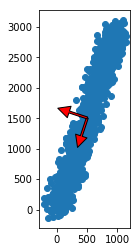

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue
xData = xTrue + np.random.normal(0, 100, N)
yData = yTrue + np.random.normal(0, 100, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
data = np.hstack((xData, yData))

mu = data.mean(axis=0)
data = data - mu
# data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
print(eigenvectors)

fig, ax = plt.subplots()
ax.scatter(xData, yData)
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

In [2]:
print data.shape

(1000, 2)


In [50]:
cov1 = data.T.dot(data)

In [29]:
cov2 = np.cov(data.T)

In [30]:
print cov2.shape,cov1.shape

(2, 2) (2, 2)


In [32]:
print np.sum(cov1-cov2)

-1.7462298274e-10


In [49]:
print eigenvalues

[ 29034.9054837    3217.62837724]


In [51]:
e1,e2 = np.linalg.eig(cov1)

In [53]:
print np.sqrt(e1)

[  3217.62837724  29034.9054837 ]
